In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import warnings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
#baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
#eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 11 }
pd.options.display.float_format = '{:.2f}'.format

In [2]:
oto1=pd.read_csv("scout_car_precleaned.csv")

In [3]:
oto1.head()

,make_model,body_type,price,vat,km,type,upholstery,cylinders,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
0,Audi A1,Sedans,15770,VAT deductible,56013.00,Used,"Cloth, Black",3.00,nan,2,1,2021-06-01,Metallic,NaN,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.80,Automatic,front,Black,99.00,1422.00,Euro 6,4.00,Diesel,5.00,5.00,66
1,Audi A1,Sedans,14500,Price negotiable,80000.00,Used,"Cloth, Grey",4.00,7.00,1,0,NaN,NaN,NaN,4 (Green),1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.60,Automatic,front,Red,129.00,1798.00,Euro 6,3.00,Benzine,3.00,4.00,141
2,Audi A1,Sedans,14640,VAT deductible,83450.00,Used,"Cloth, Black",nan,nan,1,0,NaN,Metallic,NaN,4 (Green),1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.80,Automatic,front,Black,99.00,1598.00,Euro 6,4.00,Diesel,4.00,4.00,85
3,Audi A1,Sedans,14500,NaN,73000.00,Used,NaN,3.00,6.00,1,0,NaN,Metallic,NaN,NaN,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,3.80,Automatic,NaN,Brown,99.00,1422.00,Euro 6,4.00,Diesel,3.00,4.00,66
4,Audi A1,Sedans,16790,NaN,16200.00,Used,"Cloth, Black",3.00,nan,1,1,NaN,Metallic,Germany,NaN,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,4.10,Automatic,front,Black,109.00,1422.00,Euro 6,4.00,D

In [4]:
miss_val= []
[miss_val.append(i) for i in oto1.columns if any(oto1[i].isnull())]
miss_val

['vat',
 'km',
 'type',
 'upholstery',
 'cylinders',
 'gears',
 'next_inspection',
 'paint_type',
 'country',
 'emission_label',
 'consumption_comb',
 'drive_chain',
 'displacement_cc',
 'emission_class',
 'register_age',
 'nr_doors',
 'nr_seats']

In [5]:
def fill_most(group_col, col_name):
    """
This function fills the missing values with the most frequent values groupby column 'group_col'.
For example : based on 'make_model' column, the function fill using .mode(), the most frequent value of variables.
     """
    for group in list(oto1[group_col].unique()):
        grp_inx=list(oto1[oto1[group_col]==group][col_name].index)
        oto1[col_name].iloc[grp_inx]=oto1[col_name].iloc[grp_inx].fillna(oto1[oto1[group_col]==group][col_name].mode()[0])

In [6]:
oto1.body_type.value_counts(dropna=False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [7]:
oto1.body_type[oto1.body_type== "Other"] = np.nan
fill_most("make_model", "body_type")

In [8]:
oto1.drop("cylinders", axis=1, inplace=True)

In [9]:
oto1["gears"] = oto1["gears"].fillna(oto1.groupby("make_model"))["gears"].transform("median")

TypeError: "value" parameter must be a scalar, dict or Series, but you passed a "DataFrameGroupBy"

In [10]:
oto1["upholstery"].str.contains("leather|alcantara", case=False, regex=True).value_counts(dropna=False)

False    9634
True     3720
True     2565
Name: upholstery, dtype: int64

In [11]:
oto1[oto1["gears"]== 4]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15822,Renault Espace,Van,50950,VAT deductible,11.00,New,Cloth,4.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165
15823,Renault Espace,Van,50950,VAT deductible,11.00,New,Cloth,4.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165


In [12]:
oto1.gears.iloc[15822] = 7
oto1.gears.iloc[15823] = 7

In [13]:
oto1.gears.iloc[15817] = 7
oto1.gears.iloc[15845] = 7

In [14]:
oto1[oto1["gears"]==1]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
8921,Opel Corsa,Compact,11000,VAT deductible,24000.00,Used,"Cloth, Black",1.00,1,0,NaN,Metallic,Belgium,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,4.80,Semi-automatic,front,Blue,112.00,1398.00,Euro 6,2.00,Benzine,5.00,5.00,66
14375,Renault Clio,Compact,23990,NaN,10.00,Demonstration,NaN,1.00,1,0,NaN,NaN,Austria,NaN,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,nan,Automatic,NaN,White,116.00,1618.00,NaN,2.00,Benzine,4.00,nan,147


In [15]:
oto1.gears.iloc[8921] = 5
oto1.gears.iloc[14375] = 6

In [16]:
oto1[oto1["gears"]==2]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
9812,Opel Corsa,Sedans,9880,VAT deductible,19247.00,Used,"Cloth, Black",2.00,1,0,NaN,Metallic,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,nan,Manual,NaN,Grey,116.00,1229.00,Euro 6,2.00,Benzine,5.00,nan,51


In [17]:
indx_list = list(oto1[oto1["gears"]== 9].index)

In [18]:
indx_list

[15812, 15814, 15824, 15827, 15869, 15876]

In [19]:
for indx in indx_list:
    oto1.gears.iloc[indx] = 7

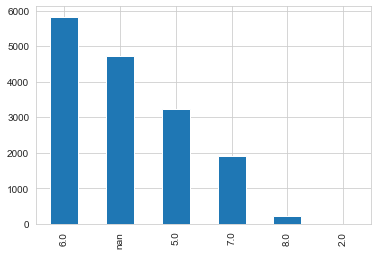

In [20]:
oto1.gears.value_counts(dropna=False).plot(kind = "bar")

In [21]:
oto1.type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

In [22]:
oto1.iloc[list(oto1.loc[oto1.type.isnull(), "type"].index)]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
2765,Audi A3,Sedans,17900,NaN,115137.00,NaN,"Cloth, Other",6.00,2,0,NaN,NaN,NaN,1 (No sticker),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,4.50,Automatic,front,White,118.00,1968.00,Euro 6,4.00,Diesel,5.00,5.00,110
5237,Audi A3,Sedans,25400,NaN,nan,NaN,"Cloth, Other",7.00,1,0,NaN,NaN,NaN,1 (No sticker),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,3.90,Automatic,front,Grey,103.00,1598.00,Euro 6,nan,Diesel,5.00,5.00,85


In [23]:
oto1.type.fillna("Used", inplace=True)

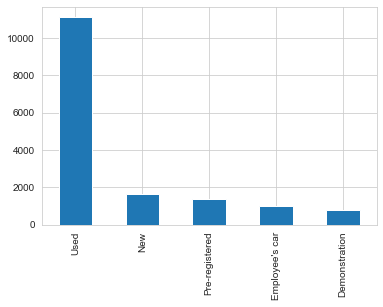

In [24]:
oto1.type.value_counts(dropna=False).plot(kind="bar")

In [25]:
oto1.upholstery.value_counts(dropna=False)

Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Full leather, Brown     116
Part leather, Grey      116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Full leather, Beige      36
Velour, Black            36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Cloth, Blue              12
Brown                    12
Velour, Grey              8
Cloth, White              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige               

In [26]:
oto1["upholstery"].str.contains("leather|alcantara", case=False, regex=True).value_counts(dropna=False)

False    9634
True     3720
True     2565
Name: upholstery, dtype: int64

In [27]:
oto1["upholstery"].str.contains("leather|alcantara", case=False, regex=True).value_counts(dropna=False).sum()

15919

In [28]:
oto1.upholstery.fillna("Cloth", limit= 1000, inplace=True)
oto1.upholstery.fillna("Leather", limit= 410, inplace=True)
oto1.upholstery.fillna("Cloth", limit= 1000, inplace=True)
oto1.upholstery.fillna("Leather", limit= 1000, inplace=True)
oto1.upholstery.fillna("Cloth", limit= 900, inplace=True)

In [29]:
upholstrey_bool_list = oto1["upholstery"].str.contains("leather|alcantara", case=False, regex=True).value_counts(dropna=False)

In [30]:
oto1.loc[upholstrey_bool_list, "upholstery"] = "Part/full Leather"

In [31]:
oto1.upholstery.loc[lambda x : x != "Part/full Leather"] = "Cloth"

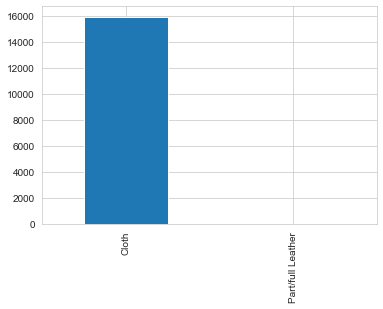

In [32]:
oto1.upholstery.value_counts(dropna=False).plot(kind="bar")

In [33]:
oto1.register_age.value_counts(dropna=False)

2.00    4522
4.00    3674
3.00    3273
1.00    2853
nan     1597
Name: register_age, dtype: int64

In [34]:
oto1[oto1.register_age.isnull()]["km"].value_counts(dropna=False)

nan         838
10.00       369
1.00        146
5.00         58
20.00        32
15.00        21
0.00         19
11.00        12
8.00         11
50.00        10
12.00         8
100.00        8
7.00          7
9.00          4
3.00          4
4.00          3
30.00         3
25.00         3
250.00        3
3000.00       2
39962.00      2
2.00          2
22627.00      2
60.00         1
6.00          1
784.00        1
196.00        1
40.00         1
6100.00       1
85000.00      1
281.00        1
11200.00      1
11000.00      1
19500.00      1
325.00        1
5000.00       1
81800.00      1
68485.00      1
99.00         1
77.00         1
500.00        1
150.00        1
142.00        1
20768.00      1
89982.00      1
89692.00      1
32084.00      1
497.00        1
141.00        1
4500.00       1
3500.00       1
34164.00      1
4307.00       1
Name: km, dtype: int64

In [35]:
oto1[oto1.register_age.isnull()]["km"].mean()

934.4967061923584

In [36]:
oto1[oto1.register_age.isnull()]["km"].median()

10.0

In [37]:
oto1.register_age.fillna(0, inplace=True)

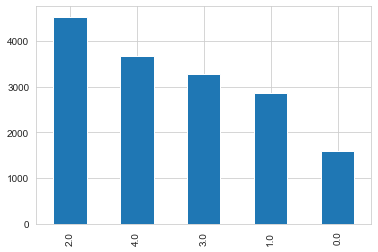

In [38]:
oto1.register_age.value_counts(dropna=False).plot(kind="bar")

In [39]:
oto1.km.value_counts(dropna=False)

10.00       1045
nan         1024
1.00         367
5.00         170
50.00        148
            ... 
8329.00        1
267.00         1
1060.00        1
73652.00       1
49320.00       1
Name: km, Length: 6690, dtype: int64

In [40]:
oto1.groupby("register_age")["km"].transform("mean")

0       77442.52
1       41754.94
2       77442.52
3       77442.52
4       77442.52
          ...   
15914     934.50
15915    2085.36
15916    2085.36
15917    2085.36
15918    2085.36
Name: km, Length: 15919, dtype: float64

In [41]:
oto1["km"] = oto1["km"].fillna(oto1.groupby("register_age")["km"].transform("mean"))

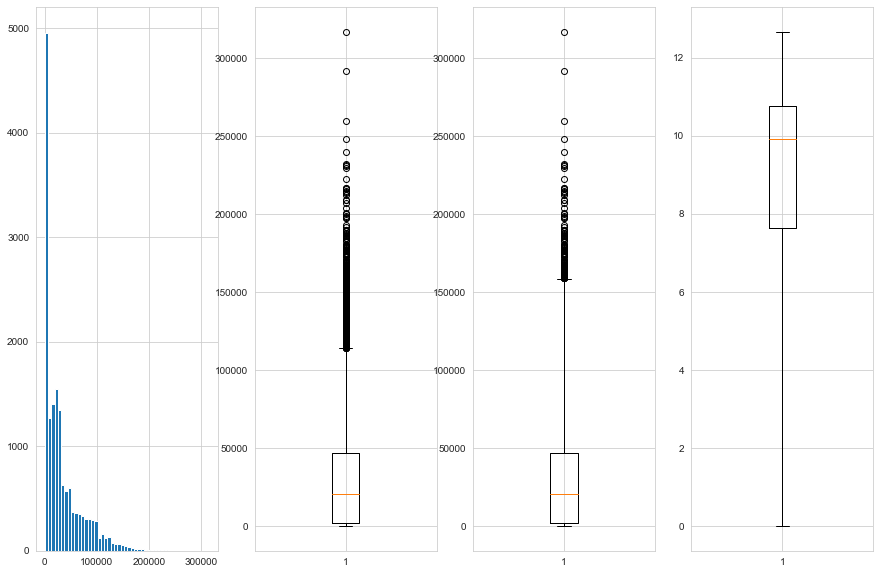

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(oto1.km, bins = 50)

plt.subplot(142)
plt.boxplot(oto1.km)

plt.subplot(143)
plt.boxplot(oto1.km, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(oto1.km), whis = 2.5)

plt.show()

In [43]:
oto1["km_logged"] = np.log(oto1.km)

In [44]:
oto1.km.sort_values(ascending= False).head()

9279    317000.00
3003    291800.00
5712    260000.00
6224    248000.00
15277   240000.00
Name: km, dtype: float64

In [45]:
oto1.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [46]:
oto1.vat.fillna(method= "ffill", inplace= True)

In [48]:
oto1["next_inspection"].value_counts(dropna=False)

NaN           12384
2021-06-01      471
2021-03-01      210
2021-05-01      180
2021-04-01      171
              ...  
2017-02-01        1
2016-05-01        1
2024-03-01        1
2016-04-01        1
2018-01-01        1
Name: next_inspection, Length: 78, dtype: int64

In [49]:
oto1.drop("next_inspection", axis=1, inplace=True)

In [50]:
oto1.drop("paint_type", axis=1, inplace=True)

In [52]:
oto1.drop("country", axis=1, inplace=True)

In [55]:
oto1.consumption_comb.sort_values().head()

8217    0.00
10566   0.00
14909   1.00
14924   1.00
14923   1.00
Name: consumption_comb, dtype: float64

In [56]:
consumption_outlier = oto1.consumption_comb.isin([0.00, 1.00, 1.20, 1.60])

In [57]:
consumption_outlier.value_counts(dropna=False)

False    15876
True        43
Name: consumption_comb, dtype: int64

In [58]:
oto1.loc[consumption_outlier, "consumption_comb"] = np.nan

In [59]:
oto1.groupby("make_model")["consumption_comb"].mean()

make_model
Audi A1          4.37
Audi A2          4.90
Audi A3          4.33
Opel Astra       4.71
Opel Corsa       5.50
Opel Insignia    5.38
Renault Clio     4.71
Renault Duster    nan
Renault Espace   5.40
Name: consumption_comb, dtype: float64

In [61]:
oto1[oto1["make_model"] == "Renault Duster"].shape[0]

34

In [62]:
oto1["consumption_comb"] = oto1["consumption_comb"].fillna(oto1.groupby("make_model")["consumption_comb"].transform("mean"))

In [64]:
 oto1["consumption_comb"].isnull().sum()

34

In [67]:
oto1["consumption_comb"] = oto1["consumption_comb"].fillna(oto1["consumption_comb"].mean())

In [68]:
 oto1["consumption_comb"].isnull().sum()

0

In [69]:
oto1.consumption_comb.sort_values().tail(50)

15814   7.60
15812   7.60
15681   7.60
15846   7.60
15803   7.60
15825   7.60
8319    7.80
8326    7.80
11432   7.80
8268    7.80
8321    7.80
8270    7.80
11219   7.90
12620   7.90
11221   7.90
10548   8.00
10571   8.00
12654   8.00
10744   8.00
10507   8.00
3609    8.10
3608    8.10
10515   8.30
3600    8.30
3599    8.30
3598    8.30
5161    8.30
3590    8.30
3587    8.30
3601    8.30
3596    8.30
3604    8.30
3603    8.30
3592    8.30
3649    8.30
3605    8.30
3606    8.30
3610    8.30
3593    8.30
3648    8.30
3602    8.30
3595    8.30
12422   8.60
12530   8.60
12553   8.60
10789   8.60
10817   8.70
12529   8.70
12054   8.70
10771   9.10
Name: consumption_comb, dtype: float64

In [70]:
oto1.consumption_comb.describe()

count   15919.00
mean        4.84
std         0.86
min         3.00
25%         4.20
50%         4.80
75%         5.40
max         9.10
Name: consumption_comb, dtype: float64

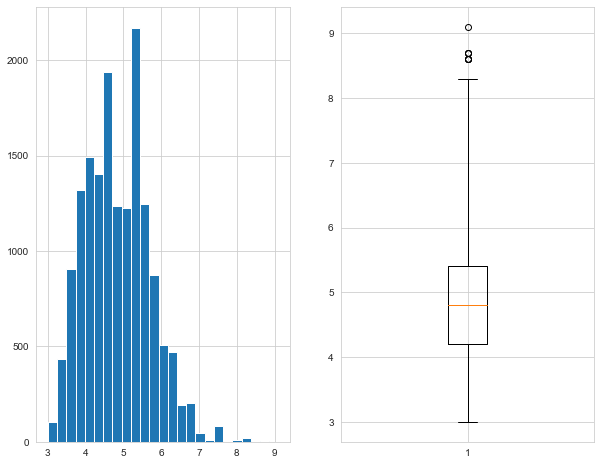

In [72]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.hist(oto1.consumption_comb, bins=25)

plt.subplot(122)
plt.boxplot(oto1.consumption_comb, whis= 2.5)

plt.show()

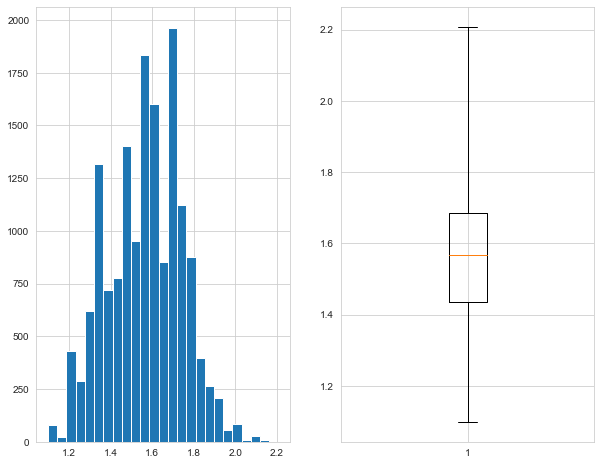

In [74]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.hist(np.log(oto1.consumption_comb), bins=25)

plt.subplot(122)
plt.boxplot(np.log(oto1.consumption_comb), whis= 2.5)

plt.show()

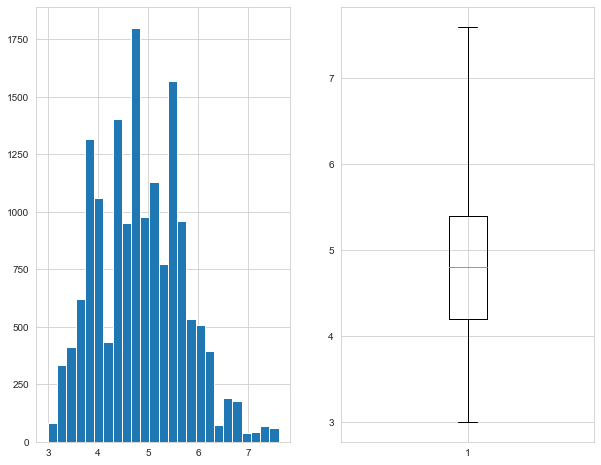

In [78]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.hist(winsorize(oto1.consumption_comb, (0.003)), bins=25)

plt.subplot(122)
plt.boxplot(winsorize(oto1.consumption_comb, (0.003)), whis = 2)
plt.show()

In [79]:
oto1.drive_chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [80]:
fill_most("make_model", "drive_chain")

In [81]:
oto1.displacement_cc.value_counts(dropna=False)

1598.00    4761
999.00     2438
1398.00    1314
1399.00     749
1229.00     677
           ... 
2967.00       1
1390.00       1
140.00        1
1350.00       1
1198.00       1
Name: displacement_cc, Length: 78, dtype: int64

In [82]:
oto1.displacement_cc.isin([np.nan]).value_counts(dropna=False)

False    15423
True       496
Name: displacement_cc, dtype: int64

In [83]:
fill_most("make_model", "displacement_cc")

In [84]:
oto1.displacement_cc.isnull().sum()

0

In [85]:
oto1.displacement_cc.describe()

count   15919.00
mean     1426.17
std       329.68
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: displacement_cc, dtype: float64

In [87]:
oto1.sort_values(by = ["displacement_cc"], ascending=False)["displacement_cc"].head(45)

10932   16000.00
7169    15898.00
10771    2967.00
3592     2480.00
3609     2480.00
3608     2480.00
3606     2480.00
3605     2480.00
3603     2480.00
3648     2480.00
3602     2480.00
3601     2480.00
3610     2480.00
3604     2480.00
3649     2480.00
3590     2480.00
3600     2480.00
3599     2480.00
3598     2480.00
3593     2480.00
3595     2480.00
3587     2480.00
3596     2480.00
11978    2000.00
11988    2000.00
2903     2000.00
12520    2000.00
12519    2000.00
12503    2000.00
12181    2000.00
12938    2000.00
12414    2000.00
12518    2000.00
11977    2000.00
11800    2000.00
12226    2000.00
12945    2000.00
12179    2000.00
12170    2000.00
12521    2000.00
11234    2000.00
10556    2000.00
13027    2000.00
13029    2000.00
13050    2000.00
Name: displacement_cc, dtype: float64

In [90]:
oto1.sort_values(by = ["displacement_cc"])["displacement_cc"].head(55)

14315     1.00
12800     1.00
12798     1.00
12796     1.00
12484     1.00
12790     1.00
12786     1.00
12783     1.00
14327     1.00
12781     1.00
14326     1.00
14325     1.00
12769     1.00
12815     1.00
14324     1.00
12768     1.00
12750     1.00
14322     1.00
14321     1.00
12670     1.00
12604     1.00
14320     1.00
12467     1.00
12473     1.00
12554     1.00
12501     1.00
12499     1.00
14319     1.00
12823     1.00
14328     1.00
12849     1.00
13904     1.00
12848     1.00
12835     1.00
14314     1.00
14284     1.00
14198     2.00
10559     2.00
13912    54.00
10194   122.00
7812    139.00
7811    139.00
7810    139.00
7809    139.00
8128    140.00
15578   160.00
15579   160.00
15574   160.00
15575   160.00
15576   160.00
15577   160.00
13653   890.00
14702   898.00
14726   898.00
14703   898.00
Name: displacement_cc, dtype: float64

In [93]:
outlier_bool_list = oto1.displacement_cc.isin([1,2,54,122,139,140,160,16000,15898])

In [94]:
oto1.loc[outlier_bool_list, "displacement_cc"] = np.nan

In [95]:
fill_most("make_model", "displacement_cc")

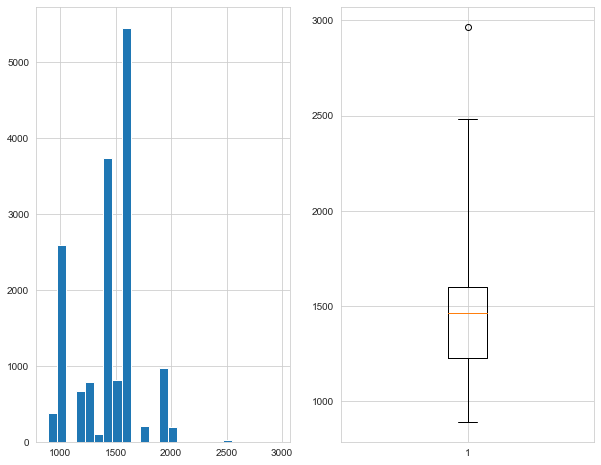

In [96]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.hist(oto1.displacement_cc, bins=25)

plt.subplot(122)
plt.boxplot(oto1.displacement_cc, whis= 2.5)

plt.show()

In [97]:
oto1.emission_class.value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class, dtype: int64

In [98]:
oto1.drop("emission_class", axis=1, inplace=True)

In [99]:
oto1.nr_doors.value_counts(dropna=False)

5.00    11575
4.00     3079
3.00      832
2.00      219
nan       212
7.00        1
1.00        1
Name: nr_doors, dtype: int64

In [100]:
fill_most("make_model", "nr_doors")

In [101]:
oto1.nr_doors.value_counts(dropna=False)

5.00    11787
4.00     3079
3.00      832
2.00      219
7.00        1
1.00        1
Name: nr_doors, dtype: int64

In [102]:
oto1[oto1["nr_doors"] == 7]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw,km_logged
15202,Renault Espace,Van,21600,Price negotiable,78000.00,Used,Cloth,6.00,1,0,NaN,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,0,1,4.60,Automatic,front,Brown,120.00,1598.00,4.00,Diesel,7.00,nan,118,11.26


In [103]:
oto1.nr_doors.iloc[15202] = 5

In [104]:
oto1[oto1["nr_doors"] == 1]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw,km_logged
13782,Renault Clio,Compact,8500,VAT deductible,41493.00,Used,Cloth,nan,1,0,NaN,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,4.71,Manual,front,White,116.00,1461.00,4.00,Diesel,1.00,nan,55,10.63


In [105]:
oto1.nr_doors.iloc[13782] = 5

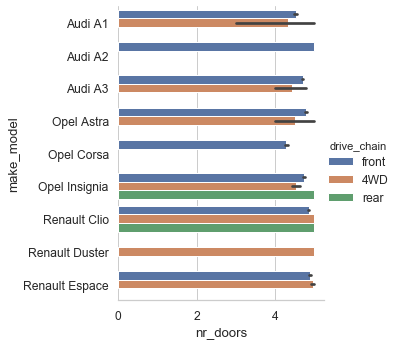

In [117]:
sns.set(style = "whitegrid", font_scale = 1.1)

g = sns.catplot(x = "nr_doors", y = "make_model", data = oto1 , hue="drive_chain", kind="bar")

g.despine(left=True);

In [118]:
oto1.nr_seats.value_counts(dropna=False)

5.00    13336
4.00     1125
nan       977
7.00      362
2.00      116
6.00        2
3.00        1
Name: nr_seats, dtype: int64

In [119]:
fill_most("make_model", "nr_seats")

In [120]:
oto1.nr_seats.value_counts(dropna=False)

5.00    14313
4.00     1125
7.00      362
2.00      116
6.00        2
3.00        1
Name: nr_seats, dtype: int64

In [121]:
oto1[oto1["nr_seats"] == 6]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw,km_logged
582,Audi A1,Compact,13500,VAT deductible,100000.00,Used,Cloth,5.00,1,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.37,Manual,front,White,116.00,1000.00,3.00,Benzine,5.00,6.00,70,11.51
15890,Renault Espace,Station wagon,42490,VAT deductible,934.50,New,Cloth,6.00,1,0,4 (Green),1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0,5.70,Automatic,front,Black,168.00,1997.00,0.00,Diesel,5.00,6.00,147,6.84


In [122]:
oto1.nr_seats.iloc[582] = 5
oto1.nr_seats.iloc[15890] = 5

In [123]:
oto1[oto1["nr_seats"] == 3]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw,km_logged
1636,Audi A1,Compact,23090,VAT deductible,9821.00,Used,Cloth,7.00,1,1,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.80,Automatic,front,Black,134.00,1798.00,2.00,Benzine,2.00,3.00,141,9.19


In [124]:
oto1.nr_seats.iloc[1636] = 5

In [125]:
oto1.fuel_new.value_counts(dropna=False)

Benzine    8550
Diesel     7299
LPG/CNG      70
Name: fuel_new, dtype: int64

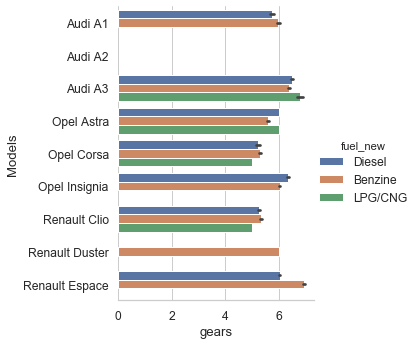

In [128]:
sns.set(style = "whitegrid", font_scale = 1.1)

g = sns.catplot(x = "gears", y = "make_model", data = oto1 , hue="fuel_new", kind="bar")

g.despine(left=True)
g.set_ylabels("Models")

In [133]:
oto1.isnull().sum()/len(oto1) * 100

make_model   0.00
body_type    0.00
price        0.00
vat          0.00
km           0.00
             ... 
fuel_new     0.00
nr_doors     0.00
nr_seats     0.00
hp_kw        0.00
km_logged    0.00
Length: 117, dtype: float64

In [132]:
oto1.corr()

,price,km,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,co2_emission,displacement_cc,register_age,nr_doors,nr_seats,hp_kw,km_logged
price,1.00,-0.40,0.57,-0.15,0.01,0.08,0.06,0.30,0.42,0.05,0.13,-0.01,0.28,0.01,0.26,0.12,0.33,0.15,0.02,0.27,0.03,0.23,0.31,0.22,0.28,0.14,0.34,0.24,0.38,0.33,0.28,0.34,0.31,-0.02,0.36,0.30,0.19,0.00,0.23,0.16,0.03,0.01,0.01,0.03,-0.08,0.25,0.08,-0.02,-0.08,0.01,0.15,0.03,-0.05,0.20,0.01,0.04,0.01,-0.01,0.04,0.14,0.03,0.02,0.11,0.13,0.16,0.13,0.02,0.02,0.14,-0.02,-0.04,0.25,0.22,0.05,0.38,-0.05,-0.07,0.00,0.09,0.01,0.01,0.34,0.06,-0.05,-0.04,0.06,-0.04,0.12,0.44,0.37,0.07,-0.00,-0.05,0.00,-0.01,0.02,0.06,0.35,0.18,0.29,0.02,0.28,-0.47,0.16,0.25,0.67,-0.36
km,-0.40,1.00,-0.04,0.14,-0.05,0.01,0.03,0.04,0.02,0.06,0.02,0.02,0.01,-0.06,0.13,-0.07,-0.04,-0.11,-0.09,-0.05,0.03,-0.06,-0.11,0.04,-0.04,-0.04,0.06,0.04,-0.09,-0.07,-0.03,-0.02,-0.06,-0.00,-0.09,-0.08,0.06,0.12,-0.02,0.05,0.06,0.03,0.01,-0.03,0.14,-0.05,-0.09,-0.04,0.08,-0.00,0.02,0.03,-0.05,-0.08,-0.02,-0.08,0.02,0.01,0.16,-0.02,0.02,-0.00,0.06,0.01,-0.01,-0.07,0.18,-0.00,-0.01,0.07,0.00,0.04,0.02,0.12,-0.01,-0.02,0.09,-0.08,0.05,-0.03,-0.10,-0.10,-0.01,0.05,0.11,-0.04,-0.03,-0.04,-0.10,-0.06,0.03,-0.03,-0.02,0.10,-0.04,-0.04,-0.01,-0.03,0.04,-0.30,-0.01,0.31,0.73,0.01,-0.01,0.00,0.64
gears,0.57,-0.04,1.00,-0.04,-0.03,0.08,0.03,0.29,0.37,0.06,0.11,0.00,0.16,-0.07,0.17,0.06,0.12,0.09,0.00,0.15,0.02,0.20,0.23,0.15,0.11,0.16,0.31,0.08,0.33,0.16,0.13,0.27,0.29,-0.02,0.27,0.15,0.15,0.07,0.16,0.07,0.02,0.03,0.01,0.08,0.02,0.10,0.07,-0.02,-0.01,0.07,0.11,0.01,-0.02,0.17,0.02,-0.00,0.03,0.00,0.09,0.15,0.04,0.01,0.14,0.13,0.17,0.07,0.06,0.00,0.14,0.01,-0.04,0.20,0.18,0.11,0.16,-0.03,-0.01,-0.06,0.11,-0.03,-0.07,0.17,0.10,0.03,0.03,0.02,-0.03,0.11,0.26,0.21,0.03,-0.06,-0.00,0.05,-0.03,-0.01,0.10,0.15,0.31,0.03,0.01,0.42,-0.08,0.12,0.11,0.51,-0.04
previous_owner,-0.15,0.14,-0.04,1.00,0.02,-0.01,0.00,0.02,-0.01,-0.01,-0.04,-0.00,-0.02,0.03,-0.01,-0.01,-0.02,-0.00,0.05,0.05,0.02,0.01,0.00,0.06,-0.01,-0.02,-0.01,0.03,-0.06,-0.01,-0.01,-0.04,-0.03,0.01,

In [136]:
numeric_col = "price,km,gears,co2_emission,previous_owner,consumption_comb,displacement_cc,register_age,hp_kw".split(",")

In [137]:
oto_corr = oto1[numeric_col]

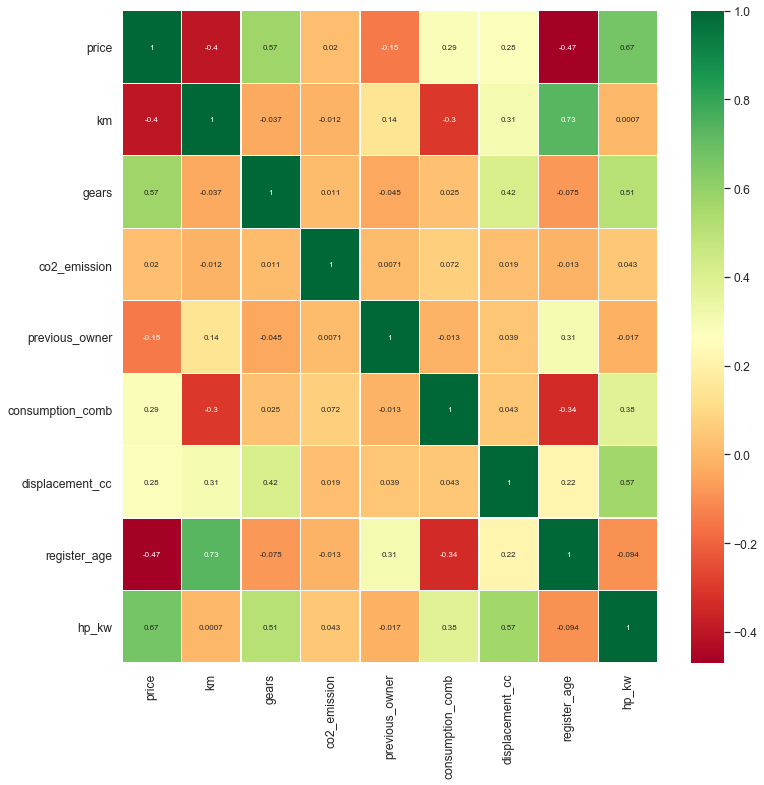

In [139]:
plt.figure(figsize = (12,12))
sns.heatmap(oto_corr.corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 8})

In [140]:
cols=["price", "co2_emission", "km", "consumption_comb", "register_age", "hp_kw"]

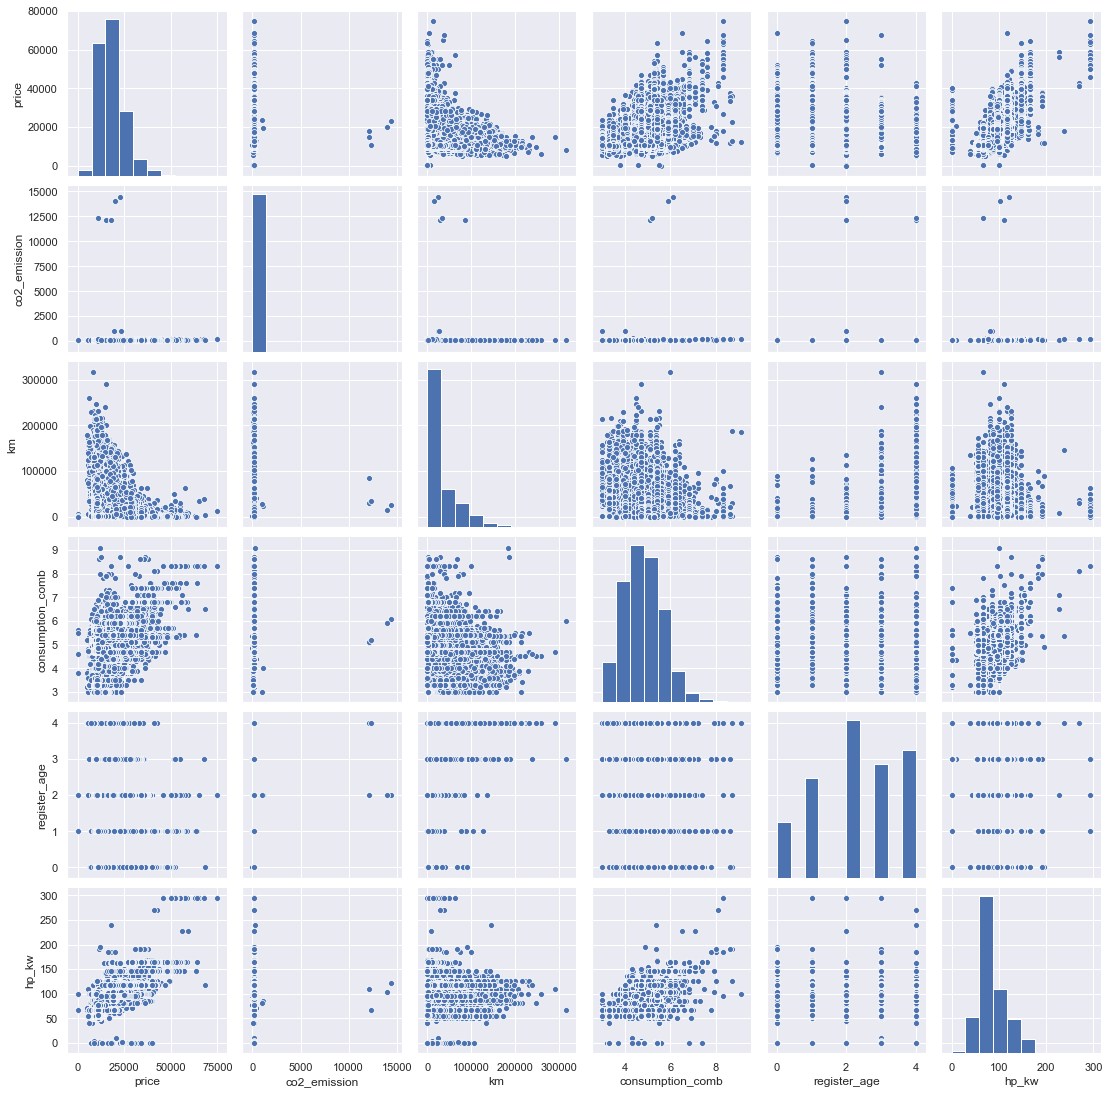

In [142]:
sns.set()

cols=["price", "co2_emission", "km", "consumption_comb", "register_age", "hp_kw"]

sns.pairplot(oto1[cols], size= 2.5)

plt.show()

In [143]:
oto1.co2_emission.describe()

count   15919.00
mean      122.56
std       248.45
min         0.00
25%       106.00
50%       116.00
75%       127.00
max     14457.00
Name: co2_emission, dtype: float64

In [144]:
oto1.drop("co2_emission", axis=1, inplace=True)

In [145]:
oto1.price.describe()

count   15919.00
mean    18019.90
std      7386.17
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

In [146]:
oto1.price.sort_values()

8594        13
8828       120
6066       255
8829       331
8827      4950
         ...  
15828    64332
3587     64900
3649     67600
15826    68320
3648     74600
Name: price, Length: 15919, dtype: int64

In [148]:
oto1.drop(index = [8594, 8828, 6066, 8829], axis= 0, inplace=True)

In [149]:
oto1.shape

(15915, 116)

In [150]:
oto1.hp_kw.sort_values().head(55)

13633    0
13864    0
11013    0
1269     0
11012    0
10910    0
13566    0
10909    0
8269     0
11163    0
13951    0
10586    0
13570    0
13572    0
13649    0
14048    0
14050    0
14057    0
14894    0
13646    0
13481    0
11183    0
12450    0
13476    0
13474    0
13471    0
13733    0
13422    0
13729    0
13488    0
13397    0
11237    0
2500     0
10167    0
13271    0
13726    0
13198    0
13158    0
4259     0
13144    0
12767    0
7670     0
14896    0
14895    0
14898    0
15261    0
15303    0
15347    0
15435    0
15438    0
15439    0
15461    0
15462    0
15468    0
15472    0
Name: hp_kw, dtype: int64

In [151]:
oto1.hp_kw.unique()

array([ 66, 141,  85,  70,  92, 112,  60,  71,  67, 110,  93, 147,  86,
       140,  87,   0,  81,  82, 135, 132, 100,  96, 162, 150, 294, 228,
       270, 137,   9, 133,  77, 101,  78, 103,   1,  74, 118,  84,  88,
        80,  76, 149,  44,  51,  55,  52,  63,  40,  65,  75, 125, 120,
       184, 239, 121, 143, 191,  89, 195, 127, 122, 154, 155, 104, 123,
       146,  90,  53,  54,  56, 164,   4, 163,  57, 119, 165, 117, 115,
        98, 168, 167], dtype=int64)

In [153]:
oto1.hp_kw.loc[oto1.hp_kw < 40] = np.nan

In [155]:
oto1.hp_kw.isnull().sum()

110

In [156]:
oto1["hp_kw"] = oto1["hp_kw"].fillna(oto1.groupby("make_model")["hp_kw"].transform("median"))

In [157]:
oto1.hp_kw.isnull().sum()

0

In [158]:
oto1.hp_kw.sort_values().head(55)

13759   40.00
8857    40.00
8408    44.00
9781    51.00
9159    51.00
10288   51.00
10289   51.00
10290   51.00
10291   51.00
10292   51.00
9158    51.00
9382    51.00
10294   51.00
10295   51.00
10296   51.00
10297   51.00
10298   51.00
10300   51.00
10301   51.00
10302   51.00
10303   51.00
10304   51.00
10305   51.00
10306   51.00
10287   51.00
10286   51.00
10285   51.00
10284   51.00
9166    51.00
10268   51.00
10269   51.00
9165    51.00
10270   51.00
10271   51.00
9371    51.00
9164    51.00
10272   51.00
10273   51.00
10274   51.00
10275   51.00
10276   51.00
10277   51.00
10278   51.00
10279   51.00
10280   51.00
10281   51.00
10282   51.00
9376    51.00
9161    51.00
9160    51.00
10283   51.00
10307   51.00
9383    51.00
9384    51.00
10308   51.00
Name: hp_kw, dtype: float64

In [159]:
oto1.shape

(15915, 116)

In [160]:
oto1.head()

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw,km_logged
0,Audi A1,Sedans,15770,VAT deductible,56013.00,Used,Cloth,nan,2,1,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.80,Automatic,front,Black,1422.00,4.00,Diesel,5.00,5.00,66.00,10.93
1,Audi A1,Sedans,14500,Price negotiable,80000.00,Used,Cloth,7.00,1,0,4 (Green),1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.60,Automatic,front,Red,1798.00,3.00,Benzine,3.00,4.00,141.00,11.29
2,Audi A1,Sedans,14640,VAT deductible,83450.00,Used,Cloth,nan,1,0,4 (Green),1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.80,Automatic,front,Black,1598.00,4.00,Diesel,4.00,4.00,85.00,11.33
3,Audi A1,Sedans,14500,VAT deductible,73000.00,Used,Cloth,6.00,1,0,NaN,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,3.80,Automatic,front,Brown,1422.00,4.00,Diesel,3.00,4.00,66.00,11.20
4,Audi A1,Sedans,16790,VAT deductible,16200.00,Used,Cloth,nan,1,1,NaN,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,4.10,Automatic,front,Black,1422.00,4.00,Diesel,5.00,5.00,66.00,9.69


In [161]:
oto2 = pd.get_dummies(oto1)

In [163]:
oto2.shape

(15915, 159)

In [164]:
oto2.head()

,price,km,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,displacement_cc,register_age,nr_doors,nr_seats,hp_kw,km_logged,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,upholstery_Cloth,upholstery_Part/full Leather,emission_label_1 (No sticker),emission_label_2 (Red),emission_label_3 (Yellow),emission_label_4 (Green),emission_label_5 (Blue),gear_type_Automatic,gear_type_Manual,gear_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,fuel_new_Benzine,fuel_new_Diesel,fuel_new_LPG/CNG
0,15770,56013.00,nan,2,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.80,1422.00,4.00,5.00,5.00,66.00,10.93,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,14500,80000.00,7.00,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.60,1798.00,3.00,3.00,4.00,141.00,11.29,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,14640,83450.00,nan,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1